## Introduction

This project has the goal to analyse a list of bmw used cars sold during the last years. By so I will answer the following questions:

1. Which is the most desirable model that BMW produce?
2. Which model loose more market value?
3. Which model gain more market value?

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('bmw.csv')

At first it's importante to learn and clean the data

In [97]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [99]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


As seend there's no need to clean the data, as no NaN was found, so let's start our analysis. 

### Q.1 Which is the most desirable model that BMW produce?

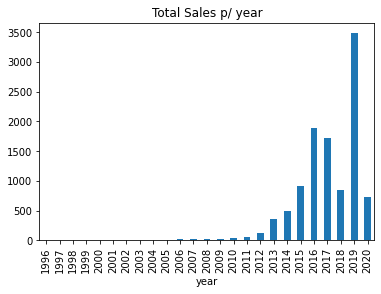

In [100]:
#At first lest get the amount of sales p/ year to latter understand the percentege per car
by_year_model = df.groupby(['year'])['model']

by_year_model.size().plot(kind="bar");
plt.title("Total Sales p/ year");

In [101]:
#Then we try to find which car was most selled by year
values = {
  'model': [],
  'perc': [],
  'sells': [],
}
years = sorted(df.year.unique())

for year in years:
  models = by_year_model.get_group(year).value_counts(sort=True, ascending=False)
  values['model'].append(models.keys()[0])
  values['sells'].append(models[0])
  values['perc'].append(models[0]/models.sum())

x = pd.DataFrame(values, index=years)
x

,model,perc,sells
1996,5 Series,1.000000,1
1997,Z3,1.000000,1
1998,Z3,1.000000,1
1999,Z3,0.750000,3
2000,5 Series,0.500000,1
2001,1 Series,0.333333,1
2002,3 Series,0.500000,3
2003,Z4,0.500000,1
2004,M3,0.333333,4
2005,3 Series,0.500000,3


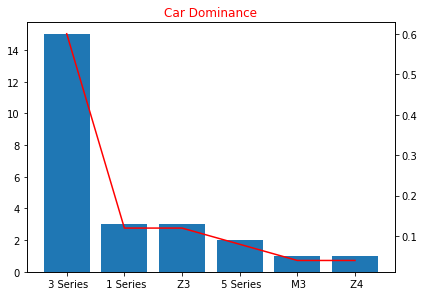

In [102]:
#Then we plot the dominance. Which car model was most sold more times
most_sold = x.groupby(['model']).size().sort_values(ascending=False)
total = most_sold.sum()
avg_sold = (most_sold/total)

fig, ax1 = plt.subplots()
ax1.bar(most_sold.index, most_sold)
ax2 = ax1.twinx()
ax2.plot(avg_sold.index, avg_sold, color="red")
fig.tight_layout()
ax1.set_title('Car Dominance', color='red')
plt.show()


### Q.2 Which model loose more market value?

In [153]:
#At first we need to manipulate ower data to the desierd format, in order to make it possible to analyse it.
years = df.year.unique()
models = df.model.unique()
drop = []
prices = df.groupby(['year','model'])['price'].mean()
avg_prices = pd.DataFrame(prices, index=pd.MultiIndex.from_product([years, models], names=['year', 'model']))
avg_prices.fillna(value=0, inplace=True)

for year in years:
  for model in models:
    if (year == 2020):
      drop.append(0)    
      continue
    cur_price = avg_prices.loc[year, model]['price']
    older_price = avg_prices.loc[year + 1, model]['price']
    if (older_price > 0 and cur_price > 0):
      drop.append(older_price - cur_price)
    else:
      drop.append(0)    

avg_prices['drop'] = drop

In [155]:
avg_prices.reset_index(level=['model'], inplace=True)
avg_prices.head()

,model,price,drop
year,,,
2014,5 Series,13237.924242,791.036542
2014,6 Series,17215.222222,3567.611111
2014,1 Series,11076.834783,537.723728
2014,7 Series,16339.375000,6140.291667
2014,2 Series,12786.190476,1630.167419


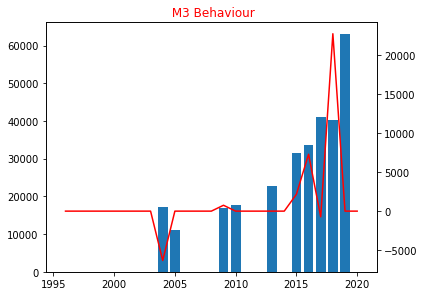

In [160]:
#then we try to find the max values and it's index
max = avg_prices[avg_prices['drop'] == avg_prices['drop'].max()]
model = avg_prices[avg_prices.model == max.model.values[0]].sort_values(by=['year'], ascending=False)

fig, ax1 = plt.subplots()
ax1.bar(model.index, model.price)
ax2 = ax1.twinx()
ax2.plot(model.index, model['drop'], color="red")
fig.tight_layout()
ax1.set_title(max.model.values[0] + ' Behaviour', color='red')
plt.show()

### Q.2 Which model gain more market value?

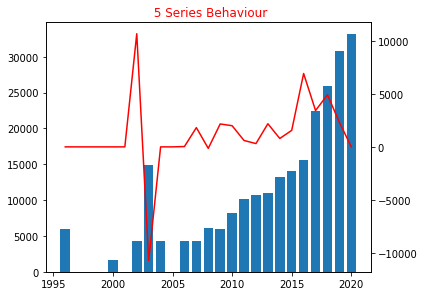

In [162]:
#Once the data is prepared it's importante to find out the model that has the max negative drop price
min = avg_prices[avg_prices['drop'] == avg_prices['drop'].min()]
model = avg_prices[avg_prices.model == min.model.values[0]].sort_values(by=['year'], ascending=False)

fig, ax1 = plt.subplots()
ax1.bar(model.index, model.price)
ax2 = ax1.twinx()
ax2.plot(model.index, model['drop'], color="red")
fig.tight_layout()
ax1.set_title(min.model.values[0] + ' Behaviour', color='red')
plt.show()